In [1]:
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Bank_Churn_Modelling.csv to Bank_Churn_Modelling.csv
User uploaded file "Bank_Churn_Modelling.csv" with length 684858 bytes


In [3]:
import pandas as pd
import io
df=pd.read_csv(io.BytesIO(uploaded["Bank_Churn_Modelling.csv"]))

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [31]:
geography=pd.get_dummies(df['Geography'],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [21]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [24]:
df.replace({'Female':0,'Male':1},inplace=True)

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df1=pd.concat([df,geography],axis=1)

In [33]:
df1.drop('Geography',axis='columns',inplace=True)

In [34]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [39]:
tenure_yes_exited=df1[df1.Exited==1].Tenure
tenure_no_exited=df1[df1.Exited==0].Tenure

(array([[  95.,  232.,  201.,  213.,  203.,  209.,  196.,  177.,  197.,
          314.],
        [ 318.,  803.,  847.,  796.,  786.,  803.,  771.,  851.,  828.,
         1160.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 Lists of Patches objects>)

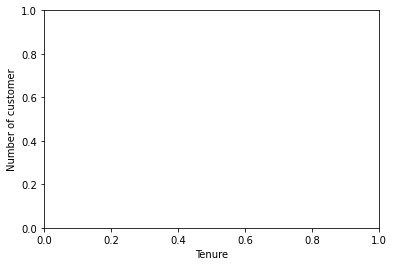

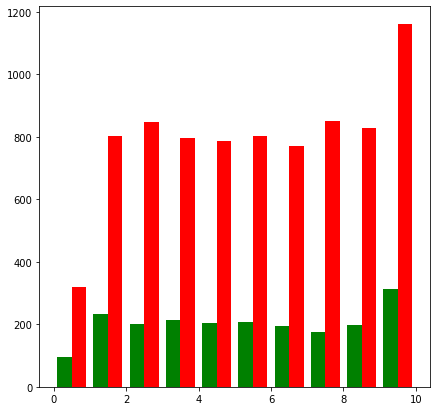

In [48]:
plt.xlabel('Tenure')
plt.ylabel('Number of customer')
plt.figure(figsize=(7,7))
plt.hist([tenure_yes_exited,tenure_no_exited],color=['green','red'])

In [49]:
col_no_zero=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df1[col_no_zero]=scaler.fit_transform(df1[col_no_zero])

In [50]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1


In [52]:
df1['IsActiveMember'].unique()

array([1, 0])

In [53]:
X=df1.drop(['Exited'],axis=1)

In [55]:
Y=df1['Exited']

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [58]:
x_train.shape

(8000, 11)

In [59]:
x_test.shape

(2000, 11)

In [60]:
import tensorflow as tf
from tensorflow import keras

In [61]:
model=keras.Sequential([
                  keras.layers.Dense(20,input_shape=(11,),activation='relu'),
                keras.layers.Dense(15,activation='relu'),
                keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
250/250 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.7857
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.7972
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8108
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8142
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8167
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8226
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8281
Epoch 8/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.8325
Epoch 9/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8329
Epoch 10/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8382

In [62]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 787us/step - loss: 0.3521 - accuracy: 0.8545


[0.3520919680595398, 0.8544999957084656]

In [68]:
y_pred=[]
yp=model.predict(x_test)
for elements in yp:
  if elements>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.72      0.46      0.56       405

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

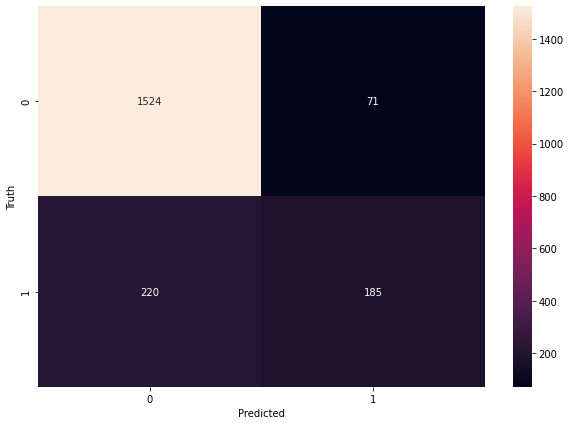

In [71]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy

In [72]:
(1524+185)/(1524+71+220+185)

0.8545

precision for Exited 0

In [75]:
round(1524/(1524+220),2)

0.87

precision for Exited 1

In [77]:
round(185/(71+185),2)

0.72

Recall for Exited 0

In [78]:
round(1524/(1524+71),2)

0.96

Recall for Exited 1

In [81]:
round(185/(185+220),2)

0.46